<h1><font color="#113D68" size=6>Deep Learning con Python y Keras</font></h1>

<h1><font color="#113D68" size=5>Parte 5. Redes Neuronales Convolucionales</font></h1>

<h1><font color="#113D68" size=4>3. Data Augmentation</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. Data Augmentation](#section1)
* [2. Datos MNIST nativos](#section2)
* [3. Estandarización de características](#section3)
* [4. Blanqueamiento ZCA](#section4)
* [5. Rotaciones aleatorias](#section5)
* [6. Desplazamientos aleatorios](#section6)
* [7. Giros aleatorios](#section7)
* [8. Guardar imágenes aumentadas](#section8)
* [9. Consejos finales](#section9)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Contexto</font>

En esta lección, descubrirá cómo utilizar la preparación y el aumento de datos de imágenes:
* Acerca de la API de Keras sobre aumento de imágenes.
* Cómo realizar la Estandarización de características.
* Cómo realizar el blanqueamiento ZCA de tus imágenes.
* Cómo aumentar los datos con rotaciones, cambios y giros aleatorios de imágenes.
* Cómo guardar datos de imágenes aumentadas en el disco.

In [1]:
import tensorflow as tf
# Eliminar warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. Data Augmentation</font>

Keras proporciona la clase `ImageDataGenerator` para la preparación y el aumento de datos de imágenes. Esto incluye capacidades como:
* Estandarización de características.
* Blanqueamiento ZCA.
* Rotación aleatoria, cambios y volteos.
* Reordenamiento de dimensiones.
* Guardar las imágenes aumentadas en el disco.

<img src="https://github.com/FMunyoz/colab/blob/main/Img/data-augmentation.jpeg?raw=1" width="550" height="550" />

El objeto generador de imágenes aumentadas será:
```python
    datagen = ImageDataGenerator()
```

Una vez creado el objeto `ImageDataGenerator`, debe ajustarlo a sus datos para poder realizar las transformaciones posteriormente. para ello utilizaremos la función `fit()` pasándole el conjunto de datos.
```python
    datagen.fit(train)
```

Podemos configurar el tamaño del batch y preparar el generador de datos llamando a la función `flow()`.
```python
    X_batch, y_batch = datagen.flow(train, train, batch_size=32)
```

Finalmente podemos hacer uso del generador de datos llamando a la función `fit_generator()` y pasar el generador de datos y la duración deseada de una época, así como el número total de épocas en las que entrenar.

```python
    fit_generator(datagen, samples_per_epoch=len(train), epochs=100)
```

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información sobre la API del generador de datos de imágenes de Keras en la [documentación oficial](http://keras.io/preprocessing/image/)


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Datos MNIST nativos</font>

Veamos un ejemplo por lo que vamos a echar un vistazo a las primeras 9 imágenes.

11501568/11490434 [==============================] - 0s 0us/step


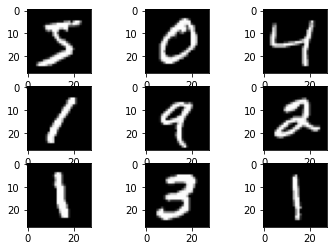

In [2]:
# Plot of images as baseline for comparison
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. Estandarización de características</font>

También es posible estandarizar los valores de los píxeles en todo el conjunto de datos. 

Los valores de los píxeles están estandarizados en todas las muestras (todas las imágenes del conjunto de datos). En este caso, cada imagen se considera una característica. 

Podemos realizar la estandarización estableciendo los argumentos de `featurewise_center` y `featurewise_std_normalization` en la clase `ImageDataGenerator`.

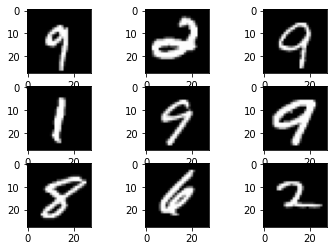

In [6]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(X_batch[i].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  break

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6>4. Blanqueamiento ZCA </font>

Una transformación de blanqueamiento de una imagen es una operación de álgebra lineal que reduce la redundancia en la matriz de imágenes de píxeles.

ZCA muestra mejores resultados y resultados en imágenes transformadas que mantienen todas las dimensiones originales y, a diferencia de PCA, las imágenes transformadas resultantes todavía se ven como sus originales. 

Para realizar ZCA configuramos el argumento `zca_whitening` en `True`.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información sobre [ZCA](http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf)


/home/manwest/Documentos/Jupyter/enviroment/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


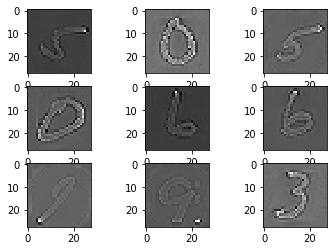

In [ ]:
# define data preparation
???

# fit parameters from data
???
# configure batch size and retrieve one batch of images
???

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section5"></a>
# <font color="#004D7F" size=6>5. Rotaciones aleatorias </font>

A veces, las imágenes de los datos de muestra pueden tener rotaciones diferentes y variables en la escena. 

Podemos crear rotaciones aleatorias de los dígitos MNIST hasta 90 grados estableciendo el argumento `rotation_range`.

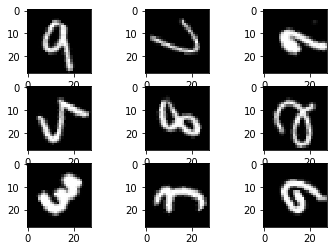

In [ ]:
# define data preparation
???

# fit parameters from data
???

# configure batch size and retrieve one batch of images
???

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section6"></a>
# <font color="#004D7F" size=6>6. Desplazamientos aleatorios </font>

Keras admite cambios aleatorios horizontales y verticales mediante los argumentos `width_shift_range` y `height_shift_range`.

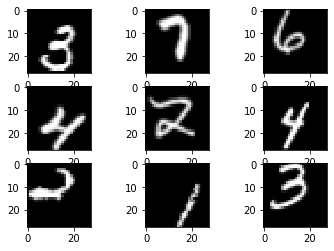

In [ ]:
# define data preparation
???
# fit parameters from data
???

# configure batch size and retrieve one batch of images
???

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section7"></a>
# <font color="#004D7F" size=6>7. Giros aleatorios </font>

Keras admite la inversión aleatoria a lo largo de los ejes vertical y horizontal utilizando los argumentos `vertical_flip` y `horizontal_flip`.

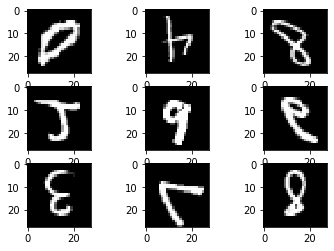

In [ ]:
# define data preparation
???

# fit parameters from data
???

# configure batch size and retrieve one batch of images
???

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section8"></a>
# <font color="#004D7F" size=6>8. Guardar imágenes aumentadas </font>

El directorio, el prefijo del nombre de archivo y el tipo de archivo de imagen se pueden especificar en la función `flow()` antes del entrenamiento. 

El siguiente ejemplo demuestra esto y escribe 9 imágenes en un subdirectorio `Img` con el prefijo `aug` y el tipo de archivo PNG.

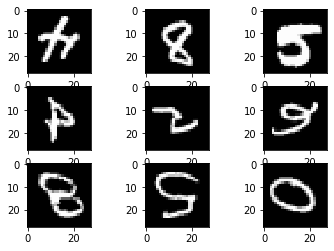

In [ ]:
# Save augmented images to file
???

# load data
???

# reshape to be [samples][width][height][channels]
???

# convert from int to float
???

# define data preparation
???

# fit parameters from data
???

# configure batch size and retrieve one batch of images
???

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section9"></a>
# <font color="#004D7F" size=6>9. Consejos finales </font>

A continuación, se incluyen algunos consejos para aprovechar al máximo esta técnica:
* **Revisar el conjunto de datos**. Tómese un tiempo para revisar su conjunto de datos con gran detalle.
* **Revisar ampliaciones**. Revise las imágenes de muestra después de que se haya realizado el aumento. 
* **Evaluar un conjunto de transformaciones**. Pruebe más de un esquema de preparación.

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>